In [1]:
from keras.datasets import imdb
import numpy as np

Using TensorFlow backend.


In [2]:
np_load_old = np.load


In [3]:
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

In [4]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

In [5]:
#The argument num_words=10000 means you’ll only keep the top 10,000 most fre-
#quently occurring words in the training data.

In [6]:
train_data.shape

(25000,)

In [7]:
test_data.shape

(25000,)

In [8]:
print(train_data[5])

[1, 778, 128, 74, 12, 630, 163, 15, 4, 1766, 7982, 1051, 2, 32, 85, 156, 45, 40, 148, 139, 121, 664, 665, 10, 10, 1361, 173, 4, 749, 2, 16, 3804, 8, 4, 226, 65, 12, 43, 127, 24, 2, 10, 10]


In [9]:
train_labels[5]

0

In [10]:
max([max(sequence) for sequence in train_data])

9999

In [11]:
#Because we’re restricting yourself to the top 10,000 most frequent words, no word
#index will exceed 10,000

In [12]:
#let us see how we can decode it back to english

In [13]:
word_index=imdb.get_word_index()

In [14]:
#word index is a dictionary mapping words to an integer index

In [15]:
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i-3,'?') for i in train_data[5]])

In [16]:
print(decoded_review)

? begins better than it ends funny that the russian submarine crew ? all other actors it's like those scenes where documentary shots br br spoiler part the message ? was contrary to the whole story it just does not ? br br


In [17]:
#encoding the interger sequences into a binary matrix


In [18]:
def vectorize_sequences(sequences, dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence]=1
        
    return results

In [19]:
X_train=vectorize_sequences(train_data)

In [20]:
X_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [21]:
X_test=vectorize_sequences(test_data)

In [22]:
#now we have to vectorize our labels as well

In [24]:
y_train=np.asarray(train_labels).astype('float32')

In [25]:
y_test=np.asarray(test_labels).astype('float32')

In [26]:
from keras import models

In [27]:
from keras import layers

In [28]:
model=models.Sequential()

W1012 13:30:56.472028 139865837348672 deprecation_wrapper.py:119] From /home/mahima/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [29]:
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))


W1012 13:31:04.615119 139865837348672 deprecation_wrapper.py:119] From /home/mahima/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1012 13:31:07.948995 139865837348672 deprecation_wrapper.py:119] From /home/mahima/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [30]:
model.add(layers.Dense(1, activation='sigmoid'))

In [31]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

W1012 13:31:18.635169 139865837348672 deprecation_wrapper.py:119] From /home/mahima/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1012 13:31:19.590450 139865837348672 deprecation_wrapper.py:119] From /home/mahima/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W1012 13:31:19.955705 139865837348672 deprecation.py:323] From /home/mahima/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [32]:
from keras import losses
from keras import metrics
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

# setting aside a validation set

In [33]:
X_val= X_train[:10000]
partial_x_train=X_train[10000:]

In [34]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [35]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=10,
batch_size=512,
validation_data=(X_val, y_val))

W1012 13:31:57.279862 139865837348672 deprecation_wrapper.py:119] From /home/mahima/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 15000 samples, validate on 10000 samples
Epoch 1/10
 2048/15000 [===>..........................] - ETA: 1:46 - loss: 0.6750 - binary_accuracy: 0.5947

/home/mahima/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118793). Check your callbacks.
  % delta_t_median)


15000/15000 [==============================] - 21s 1ms/step - loss: 0.5046 - binary_accuracy: 0.7881 - val_loss: 0.3777 - val_binary_accuracy: 0.8705
Epoch 2/10
15000/15000 [==============================] - 3s 219us/step - loss: 0.2991 - binary_accuracy: 0.9045 - val_loss: 0.3002 - val_binary_accuracy: 0.8897
Epoch 3/10
15000/15000 [==============================] - 4s 280us/step - loss: 0.2173 - binary_accuracy: 0.9283 - val_loss: 0.3074 - val_binary_accuracy: 0.8723
Epoch 4/10
15000/15000 [==============================] - 3s 217us/step - loss: 0.1747 - binary_accuracy: 0.9439 - val_loss: 0.2825 - val_binary_accuracy: 0.8844
Epoch 5/10
15000/15000 [==============================] - 3s 215us/step - loss: 0.1420 - binary_accuracy: 0.9542 - val_loss: 0.2858 - val_binary_accuracy: 0.8855
Epoch 6/10
15000/15000 [==============================] - 3s 211us/step - loss: 0.1147 - binary_accuracy: 0.9651 - val_loss: 0.3116 - val_binary_accuracy: 0.8789
Epoch 7/10
15000/15000 [================

In [36]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

In [39]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['binary_accuracy']) + 1)

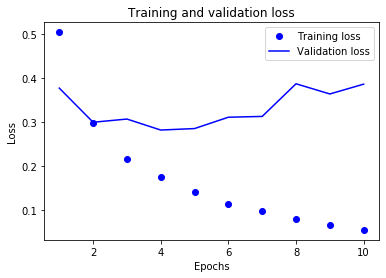

In [40]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [41]:
#plotting the training and validation loss


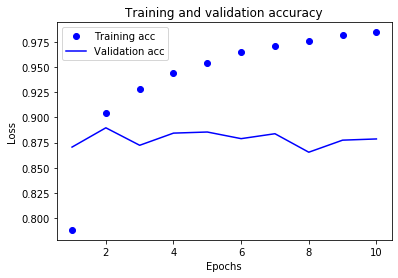

In [44]:
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
plt.plot(epochs, history_dict['binary_accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_binary_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [45]:
model.predict(X_test)

array([[0.09982118],
       [0.9999383 ],
       [0.8607079 ],
       ...,
       [0.03345141],
       [0.03905886],
       [0.62966526]], dtype=float32)

In [46]:
#we can see that the model is confident for some samples but less confident for the others.